<a href="https://colab.research.google.com/github/jonahokiru/hello-world/blob/master/Moringa_Dsc14_Core_Machine_Week_8_IP_Jonah_Okiru_04_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Define the question

## a) specifying the question.

Use the data collected by the Nairobi hospital on the hypothroid patients, to build a model that determines if the patient symptoms indicates whether the patient has hypothroid or not.

## b) The metric of success.

The model should be in position to determine if the patient has hypothroid or not with the accuracy score of 70%.

## c) Understanding the contest.

Nairobi hospital is  a hosiptal in based in Nairobi kenya. The hospital deals with the patients suffering from various types of diseases ranging from acute to chronic. In order to determine the type of disease the patient suffers from the hospital uses the patients symptoms.

## d) Recording the experimental design.

Hypothesis: To determine if the detection of hypothroid in patients  is dependent on the symptoms exhibit by the patients.

X-axis: AgeSex, on_thyroxine, query_on_thyroxine
on_antithyroid_medicationthyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, sick, tumor, lithium, goitre, TSH_measured, TSH,T3_measured, T3, TT4_measured, TT4.

Y-axis: Status.

Experimental set up: I hypothesize the status of hypothroid based on the features stated on the X- axis.

Design of the experiment: Analyze the symptoms of 3164 patients.

# 2. Reading the data.

## a) Import the libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

## b) Loading Data.

In [2]:
hypothroid = pd.read_csv('http://bit.ly/hypothyroid_data')

## c) Checking the data.

In [3]:
#Check the number of record in the dataset
hypothroid.shape

(3163, 26)

In [4]:
#Preview the top of the dataset
hypothroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?


In [5]:
#preview the bottom of the datasets
hypothroid.tail(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
#Check the column of the data
hypothroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [7]:
#Check the columns name of the data
hypothroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

# 3. External data validation.

## a) Validation [Hypothroid Symptoms](https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284)

# 4. Tidying the dataset.

In [8]:
#Checking for the missing values
hypothroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [9]:
#Replace the character of ? in the data.
hypothroid ['age']= hypothroid ['age'].str.replace('?', '0', regex=True)
hypothroid ['TSH']= hypothroid ['TSH'].str.replace('?', '0', regex=True)
hypothroid ['T3']= hypothroid ['T3'].str.replace('?', '0', regex=True)
hypothroid ['TT4']= hypothroid ['TT4'].str.replace('?', '0', regex=True)
hypothroid ['T4U']= hypothroid ['T4U'].str.replace('?', '0', regex=True)
hypothroid ['FTI']= hypothroid ['FTI'].str.replace('?', '0', regex=True)
hypothroid ['TBG']= hypothroid ['TBG'].str.replace('?', '0', regex=True)





In [10]:
#Preview the dataset
hypothroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,0


In [11]:
#Convert the column data types from objects to categoricals, integ
hypothroid['sex'] = hypothroid['sex'].astype('category')
hypothroid['status'] = hypothroid['status'].astype('category')
hypothroid['on_thyroxine'] = hypothroid['on_thyroxine'].astype('category')
hypothroid['query_on_thyroxine'] = hypothroid['query_on_thyroxine'].astype('category')
hypothroid['on_antithyroid_medication'] = hypothroid['on_antithyroid_medication'].astype('category')
hypothroid['thyroid_surgery'] = hypothroid['thyroid_surgery'].astype('category')
hypothroid['query_hypothyroid'] = hypothroid['query_hypothyroid'].astype('category')
hypothroid['query_hyperthyroid'] = hypothroid['query_hyperthyroid'].astype('category')
hypothroid['pregnant'] = hypothroid['pregnant'].astype('category')
hypothroid['sick'] = hypothroid['sick'].astype('category')
hypothroid['tumor'] = hypothroid['tumor'].astype('category')
hypothroid['lithium'] = hypothroid['lithium'].astype('category')
hypothroid['goitre'] = hypothroid['goitre'].astype('category')
hypothroid['TSH_measured'] = hypothroid['TSH_measured'].astype('category')
hypothroid['T3_measured'] = hypothroid['T3_measured'].astype('category')
hypothroid['TT4_measured'] = hypothroid['TT4_measured'].astype('category')
hypothroid['T4U_measured'] = hypothroid['T4U_measured'].astype('category')
hypothroid['FTI_measured'] = hypothroid['FTI_measured'].astype('category')
hypothroid['TBG_measured'] = hypothroid['TBG_measured'].astype('category')
hypothroid['age'] = hypothroid['age'].astype('int')
hypothroid['TSH'] = hypothroid['TSH'].astype('float')
hypothroid['T3'] = hypothroid['T3'].astype('float')
hypothroid['TT4'] = hypothroid['TT4'].astype('float')
hypothroid['T4U'] = hypothroid['T4U'].astype('float')
hypothroid['FTI'] = hypothroid['FTI'].astype('float')
hypothroid['TBG'] = hypothroid['TBG'].astype('float')
hypothroid['T4U'] = hypothroid['T4U'].astype('float')




In [12]:
#preview the data types of the columns
hypothroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   category
 1   age                        3163 non-null   int64   
 2   sex                        3163 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   category
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

In [13]:
#Convert the categorical to numericals
hypothroid['sex'] = labelencoder.fit_transform(hypothroid['sex'])
hypothroid['status'] = labelencoder.fit_transform(hypothroid['status'])
hypothroid['on_thyroxine'] = labelencoder.fit_transform(hypothroid['on_thyroxine'])
hypothroid['query_on_thyroxine'] = labelencoder.fit_transform(hypothroid['query_on_thyroxine'])
hypothroid['on_antithyroid_medication'] = labelencoder.fit_transform(hypothroid['on_antithyroid_medication'])
hypothroid['thyroid_surgery'] = labelencoder.fit_transform(hypothroid['thyroid_surgery'])
hypothroid['query_hypothyroid'] = labelencoder.fit_transform(hypothroid['query_hypothyroid'])
hypothroid['query_hyperthyroid'] = labelencoder.fit_transform(hypothroid['query_hyperthyroid'])
hypothroid['pregnant'] = labelencoder.fit_transform(hypothroid['pregnant'])
hypothroid['sick'] = labelencoder.fit_transform(hypothroid['sick'])
hypothroid['tumor'] = labelencoder.fit_transform(hypothroid['tumor'])
hypothroid['lithium'] = labelencoder.fit_transform(hypothroid['lithium'])
hypothroid['goitre'] = labelencoder.fit_transform(hypothroid['goitre'])
hypothroid['TSH_measured'] = labelencoder.fit_transform(hypothroid['TSH_measured'])
hypothroid['T3_measured'] = labelencoder.fit_transform(hypothroid['T3_measured'])
hypothroid['TT4_measured'] = labelencoder.fit_transform(hypothroid['TT4_measured'])
hypothroid['T4U_measured'] = labelencoder.fit_transform(hypothroid['T4U_measured'])
hypothroid['FTI_measured'] = labelencoder.fit_transform(hypothroid['FTI_measured'])
hypothroid['TBG_measured'] = labelencoder.fit_transform(hypothroid['TBG_measured'])




In [14]:
#Preview the dataset
hypothroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72,2,0,0,0,0,0,0,0,...,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,0,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0


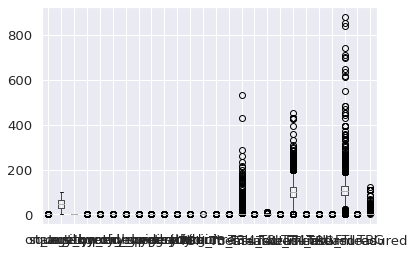

In [15]:
#Check for the outliers
hypothroid.boxplot()

# 5. Implementing the solution.

## a). Part 1: Decision trees

### (i). Random forests.

In [16]:
# Split the datasets into depedent and independent variables
y = hypothroid['status'].values
test_features = hypothroid.columns.to_list()
test_features.remove('status')
X = hypothroid [test_features].values

In [17]:
#Train using the 75% of the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
#import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, min_samples_split=10, max_depth= 4,
                                random_state=42, max_features = 2, bootstrap=True)
#Trained the model
forest = forest.fit(X_train, y_train)
# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,791.000000,791.000000
mean,0.954488,0.981037
std,0.208556,0.136482
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [19]:
from sklearn import metrics

# And now we assess the errors

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9683944374209861


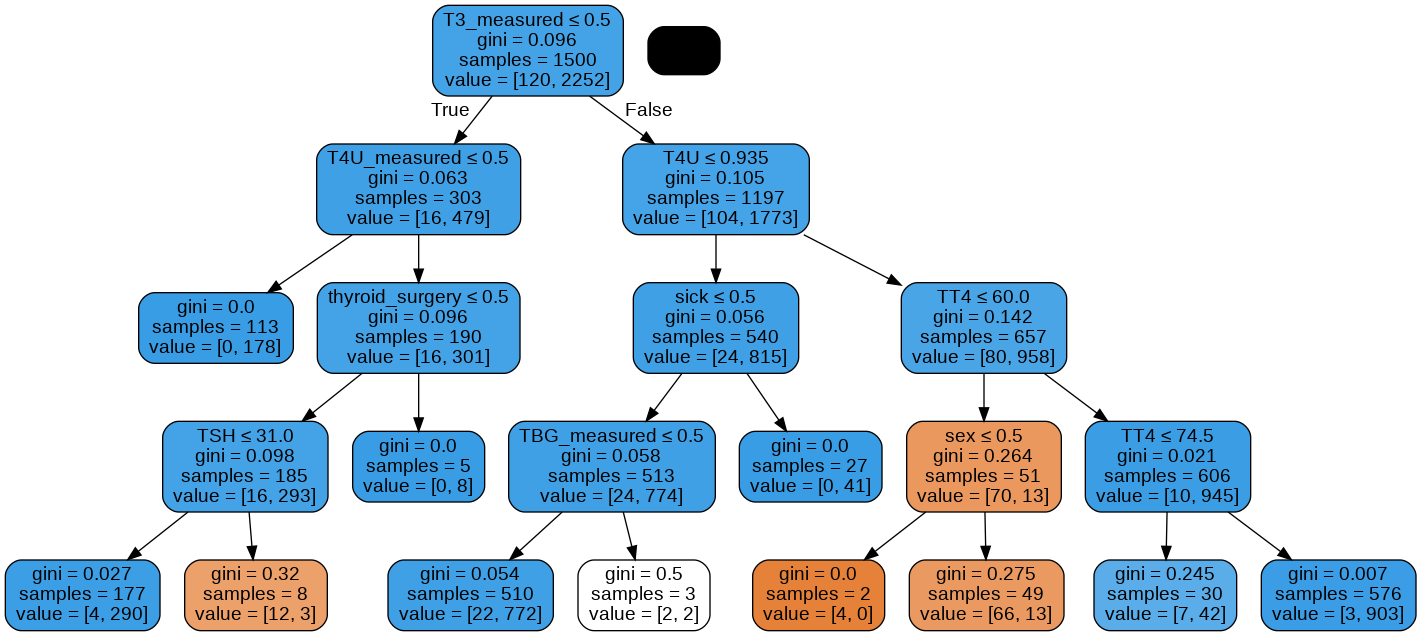

In [20]:
#Visualize the random forest
#Visualize
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('deposit_forest.png')
Image(graph.create_png())

In [21]:
feature_imp = pd.Series(forest.feature_importances_, index =test_features).sort_values(ascending = False)
feature_imp


TSH                          0.242756
TT4                          0.225067
FTI                          0.212659
T3                           0.054932
T4U                          0.046038
FTI_measured                 0.031245
TSH_measured                 0.029107
age                          0.025361
TBG                          0.024273
TT4_measured                 0.023222
TBG_measured                 0.023154
T3_measured                  0.014426
thyroid_surgery              0.008254
on_thyroxine                 0.008201
T4U_measured                 0.007053
query_hypothyroid            0.006070
sick                         0.005427
sex                          0.003405
on_antithyroid_medication    0.002403
pregnant                     0.002303
query_hyperthyroid           0.002016
query_on_thyroxine           0.001250
goitre                       0.000983
tumor                        0.000396
lithium                      0.000000
dtype: float64

The features that are most impactful in the prediction of random forest classifiers are ;
TSH                          0.242756, 
TT4                          0.225067, 
FTI                          0.212659, 
T3                           0.054932, 
T4U                          0.046038, 
FTI_measured                 0.031245, 
TSH_measured                 0.029107, 
age                          0.025361, 
TBG                          0.024273, 
TT4_measured                 0.023222, 
TBG_measured                 0.023154, 
T3_measured                  0.014426, 
thyroid_surgery              0.008254, 
on_thyroxine                 0.008201, 
T4U_measured                 0.007053, 
query_hypothyroid            0.006070, 
sick                         0.005427, 
sex                          0.003405, 
on_antithyroid_medication    0.002403, 
pregnant                     0.002303, 
query_hyperthyroid           0.002016, 
query_on_thyroxine           0.001250, 
goitre                       0.000983, 
tumor                        0.000396.

### (ii) Ada boost trees

In [22]:
#Adaboost model
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42
                            )
adaboost_model=adaboost.fit(X_train, y_train)

In [23]:
#Prediction
y_pred=adaboost_model.predict(X_test)

In [24]:
#The accuracy score of the adaboostclassifiers
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9823008849557522


In [25]:
#Features that are most impactful in the classification of the reandom forest classifier.
feature_imp = pd.Series(adaboost_model.feature_importances_, index =test_features).sort_values(ascending = False)
feature_imp

TSH                          0.220
age                          0.185
FTI                          0.165
T4U                          0.155
TT4                          0.095
on_antithyroid_medication    0.055
T3                           0.045
on_thyroxine                 0.035
thyroid_surgery              0.035
query_on_thyroxine           0.005
sick                         0.005
TBG_measured                 0.000
FTI_measured                 0.000
T4U_measured                 0.000
TT4_measured                 0.000
goitre                       0.000
T3_measured                  0.000
TSH_measured                 0.000
sex                          0.000
lithium                      0.000
tumor                        0.000
pregnant                     0.000
query_hyperthyroid           0.000
query_hypothyroid            0.000
TBG                          0.000
dtype: float64

The features that are most impactful in the prediction of the adaboost classifier are; 
TSH                          0.220, 
age                          0.185, 
FTI                          0.165, 
T4U                          0.155, 
TT4                          0.095, 
on_antithyroid_medication    0.055, 
T3                           0.045, 
on_thyroxine                 0.035, 
thyroid_surgery              0.035, 
query_on_thyroxine           0.005, 
sick                         0.005.

### (iii). Gradient boost.

In [26]:
#Gradient boost model
gradientboost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, random_state=42)
gradientboost_model = gradientboost.fit(X_train, y_train)


In [27]:
#Prediction
y_pred=gradientboost_model.predict(X_test)


In [28]:
#Check for the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9860935524652339


In [29]:
#Feature importance
feature_imp = pd.Series(gradientboost_model.feature_importances_, index =test_features).sort_values(ascending = False)
feature_imp

TSH                          6.102629e-01
FTI                          3.199696e-01
on_antithyroid_medication    2.049471e-02
age                          1.645471e-02
T4U                          1.260356e-02
TT4                          8.841830e-03
query_hypothyroid            5.556081e-03
on_thyroxine                 2.108055e-03
thyroid_surgery              1.591639e-03
T3                           1.555253e-03
pregnant                     3.625101e-04
T3_measured                  1.387675e-04
TT4_measured                 2.294013e-05
TSH_measured                 1.800157e-05
sex                          1.245018e-05
T4U_measured                 4.295808e-06
TBG                          2.467279e-06
TBG_measured                 1.233840e-07
goitre                       6.881628e-08
FTI_measured                 7.737494e-09
lithium                      0.000000e+00
tumor                        0.000000e+00
sick                         0.000000e+00
query_hyperthyroid           0.000

The most impactful features of the geadient boost classifiers are ;
TSH                          6.102629e-01, 
FTI                          3.199696e-01, 
on_antithyroid_medication    2.049471e-02, 
age                          1.645471e-02, 
T4U                          1.260356e-02, 
TT4                          8.841830e-03, 
query_hypothyroid            5.556081e-03, 
on_thyroxine                 2.108055e-03, 
thyroid_surgery              1.591639e-03, 
T3                           1.555253e-03, 
pregnant                     3.625101e-04, 
T3_measured                  1.387675e-04, 
TT4_measured                 2.294013e-05, 
TSH_measured                 1.800157e-05, 
sex                          1.245018e-05, 
T4U_measured                 4.295808e-06, 
TBG                          2.467279e-06, 
TBG_measured                 1.233840e-07, 
goitre                       6.881628e-08, 
FTI_measured                 7.737494e-09.

The model that i trust most is the random forest models these is because the number of features that are impactful in the prediction of the model are more compared to other models, hence making it the most trusted model in the prediction.

# b) Part 2: SVM (Support Vector Machine)



### (i)Linear

In [30]:
## Applying the reduction algorithm: PCA. To reduce the number of features to  2 for easy visualization
hypothroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   int64  
 1   age                        3163 non-null   int64  
 2   sex                        3163 non-null   int64  
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

In [31]:
# The two features used for T3_measured, TT4 
X_1 = hypothroid [['T3_measured', 'TT4']].values


In [32]:
#Train the model again y and X1 variables
#Train using the 75% of the datasets
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size=0.25, random_state=0)

In [33]:
#Apply the linear model
# Fit the model
linear = SVC(kernel= 'linear', C = 10, gamma = 'auto')
linear_model = linear.fit(X_1_train,y_train)

In [34]:
#Make the prediction using the linear model
y_pred= linear_model.predict(X_1_test)

In [35]:
#Check the accuracy score and confusion matrix of the linear model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9683944374209861
[[ 17  19]
 [  6 749]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


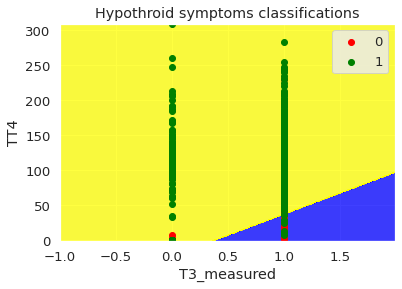

In [36]:
#Visualize the linear model.
from matplotlib.colors import ListedColormap
X_set, y_set = X_1_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, linear_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Hypothroid symptoms classifications')
plt.xlabel('T3_measured')
plt.ylabel('TT4')
plt.legend()
plt.show()

### (ii) Radial basis function.

In [37]:
#Radial basis function rbf
from sklearn.svm import SVC
rbf = SVC(kernel ='rbf',gamma='auto', C=10, random_state = 0)
rbf_model = rbf.fit(X_1_train, y_train)


In [38]:
#predict the model
y_pred = rbf_model.predict(X_1_test)

In [39]:
#Model evaluation
#Check the accuracy score and confusion matrix of the linear model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9683944374209861
[[ 23  13]
 [ 12 743]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


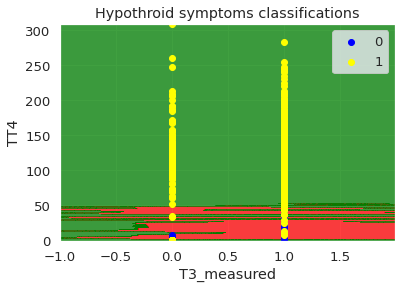

In [40]:
#Visualize the rbf model
from matplotlib.colors import ListedColormap
X_set, y_set = X_1_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rbf_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Hypothroid symptoms classifications')
plt.xlabel('T3_measured')
plt.ylabel('TT4')
plt.legend()
plt.show()

### (iii) Polynomial kernel.

In [42]:
#polynomial model 
from sklearn.svm import SVC
poly = SVC(kernel ='poly', degree = 2, gamma = 'auto', C = 10, random_state = 0)
poly_model = poly.fit(X_1_train, y_train)


In [43]:
#Prediction model
y_pred = poly_model.predict(X_1_test)

In [44]:
#Model evaluation
#Check the accuracy score and confusion matrix of the polynomial model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95448798988622
[[  0  36]
 [  0 755]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


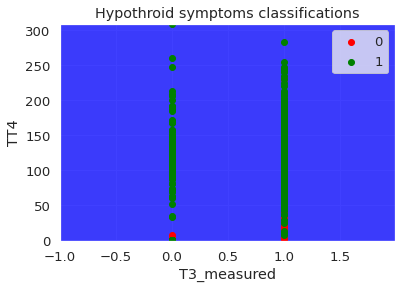

In [45]:
#Visualize the the polynomial model
from matplotlib.colors import ListedColormap
X_set, y_set = X_1_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, poly_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Hypothroid symptoms classifications')
plt.xlabel('T3_measured')
plt.ylabel('TT4')
plt.legend()
plt.show()

The kernel that performs best in the prediction is the rbf kernel.

The rbf kernel with the more features.

In [46]:
#Radial basis function rbf
from sklearn.svm import SVC
rbf = SVC(kernel ='rbf',gamma='auto', C=10, random_state = 0)
rbf_model = rbf.fit(X_train, y_train)

#predict the model
y_pred = rbf_model.predict(X_test)
#Model evaluation
#Check the accuracy score and confusion matrix of the linear model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9595448798988622
[[  4  32]
 [  0 755]]


The accuracy score of the rbf model with the two features is 96.84% compared to the one where more features are used which is slightly lower at  95.96%. This is beacuse with more features included in the model the impact of features in creating the model is weaken by the features that have weak impact in the prediction of the model compared to when the two features are used where the impacts are less thus having high accuracy score.

# 6. Challenging the solution.

Even though the classifier models implemented achieve accuracy scored above the one set by the metric score of success, the impact of some features in the prediction of the models were still much less impactfull. Which still posses some doubtfullness about the accuracy of the models.

# 7. Follow up questions.

### a). Do we have the right data?

Yes the data was appropriate since it had the number of features to be used to build the models.Futhermore the data was of appropriate size to be used for the project.

### b) Do we need another data to answer the question.

We don't need another data to answer the questions since the data we had was appropriate for the project.

### c) Do we have the right question.

Yes the question was appropriate. 